## Task 5 : Image Compression using Matrix Factorisation [3 Marks]
    
You have an image patch of size (50x50) that you want to compress using matrix factorization. To do this, you'll split the patch $[N\times N]$ into two smaller matrices of size $[N\times r]$ and $[r\times N]$ using matrix factorization. Compute the compressed patch by multiplying these two matrices and compare the reconstructed image patch with the original patch. Compute the Root Mean Squared Error (RMSE) and Peak Signal-to-Noise Ratio (PSNR) between the original and reconstructed image patches.

- Test different values for the low-rank $r = [5, 10, 25, 50]$.
- Use Gradient Descent to learn the compressed matrices.
- Display the reconstructed image patches, keeping the original pixel values outside the patch unchanged, and use your compressed matrix for the patch to show how well the reconstruction works.
- Compute the RMSE and PSNR for each value of $r$. 

Here is a reference set of patches that you can choose. You can chose an image of your liking and create patches. You can choose the image shown below as well. **[3 Marks]**

<div style="display: flex;">
  <img src="sample_images/1colour.jpg" alt="Image 1" width="250"/>
  <img src="sample_images/2-3_colours.jpg" alt="Image 2" width="270"/>
  <img src="sample_images/multiple_colours.jpg" alt="Image 3" width="265"/>
</div>

<br>


In [105]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from einops import rearrange

import warnings

# Remove warnings
warnings.filterwarnings('ignore')

In [3]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

In [53]:
# Function to compute RMSE
def compute_rmse(original, reconstructed):
    # print(original.shape, reconstructed.shape)
    assert original.shape == reconstructed.shape, "Input shapes must match"
    return torch.sqrt(torch.mean((original - reconstructed) ** 2))

def psnr(original, recontructed):
  assert original.shape == recontructed.shape, "Input shapes must match."

  original = original.flatten()
  recontructed = recontructed.flatten()
  rmse = torch.sqrt(torch.mean((original - recontructed) ** 2))
  max_pixel = torch.max(original)

  return 20 * torch.log10(max_pixel / rmse)


In [110]:
import torch.nn as nn
import torch.optim as optim

r = [5, 10, 25, 50]
def matrix_factorization(X, r, lr = 0.009, epochs = 1000, verbose = True):
    N = X.shape[0] # NxN matrix
    X = torch.tensor(X, dtype=torch.float32)

    U = nn.Parameter(torch.rand(N, r, requires_grad=True))
    V = nn.Parameter(torch.randn(r, N, requires_grad=True))

    optimizer = optim.Adam([U, V], lr = lr)
    
    loss_f = nn.MSELoss()

    for epoch in range(0, epochs):
        X_hat = torch.mm(U, V)

        loss = loss_f(X_hat, X)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0 and verbose:
            print(f"Epoch: [{epoch}/{epochs}], Loss: {loss.item():.6f}")
        
    return U.detach(), V.detach(), loss


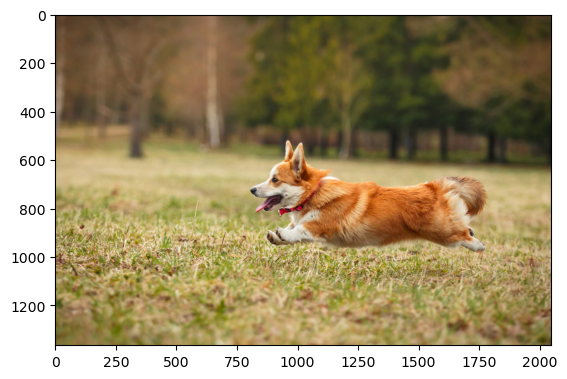

In [6]:
dog = torchvision.io.read_image('dog.jpg')
plt.imshow(rearrange(dog, 'c h w -> h w c').cpu().numpy())
# crop.shape

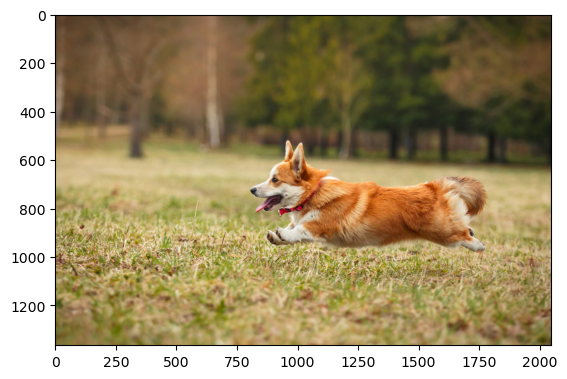

In [19]:
#dog is an image
dog_1 = dog[0,:,:]
dog_2 = dog[1, :, :]
dog_3 = dog[2, :, :]

plt.imshow(dog_1)
# plt.imshow(dog_2)
# plt.imshow(dog_3)
dog_rgb = torch.stack([dog_1, dog_2, dog_3], dim = 0)

# plt.imshow(torch.stack)
plt.imshow(rearrange(dog_rgb, 'c h w -> h w c').cpu().numpy())

In [20]:
# # Make grayscale
# dog = torch.tensor(dog, dtype=torch.float)
# dog = dog.mean(dim=0, keepdim=False)

# print(dog.shape)
# plt.imshow(dog, cmap='gray')


In [29]:
from matplotlib.patches import Rectangle

def show_patches(crop, patch_1, patch_2, patch_3):
    
    print(patch_1.shape, patch_2.shape, patch_3.shape)

    fig, axs = plt.subplots(2, 3, figsize=(12, 8))  # 2 rows, 3 columns

    # Plot the cropped image with rectangles on the first row, first column
    im = axs[0, 0].imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy(), cmap='gray')
    im1 = axs[0, 1].imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy(), cmap='gray')
    im2 = axs[0, 2].imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy(), cmap='gray')
    axs[0, 0].set_title("Cropped Image with Patches")
    axs[0, 1].set_title("Cropped Image with Patches")
    axs[0, 2].set_title("Cropped Image with Patches")

    # Create the rectangular patches on the cropped image
    rect1 = Rectangle((0, 0), 50, 50, linewidth=2, edgecolor='r', facecolor='none')
    rect2 = Rectangle((50, 50), 50, 50, linewidth=2, edgecolor='g', facecolor='none')
    rect3 = Rectangle((100, 175), 50, 50, linewidth=2, edgecolor='b', facecolor='none')

    # Add rectangles to the first cropped image
    axs[0, 0].add_patch(rect1)
    axs[0, 1].add_patch(rect2)
    axs[0, 2].add_patch(rect3)

    # Empty the next two subplots in the first row
    axs[0, 1].axis('off')
    axs[0, 2].axis('off')

    # Plot individual patches on the second row
    axs[1, 0].imshow(rearrange(patch_1, 'c h w -> h w c').cpu().numpy())
    axs[1, 0].set_title("Patch 1")

    axs[1, 1].imshow(rearrange(patch_2, 'c h w -> h w c').cpu().numpy())
    axs[1, 1].set_title("Patch 2")

    axs[1, 2].imshow(rearrange(patch_3, 'c h w -> h w c').cpu().numpy())
    axs[1, 2].set_title("Patch 3")

    # Adjust layout for better spacing between plots
    plt.tight_layout()

    # Show the figure
    plt.show()

                    

(3, 1365, 2048)
torch.Size([3, 300, 300])
torch.Size([3, 50, 50]) torch.Size([3, 50, 50]) torch.Size([3, 50, 50])


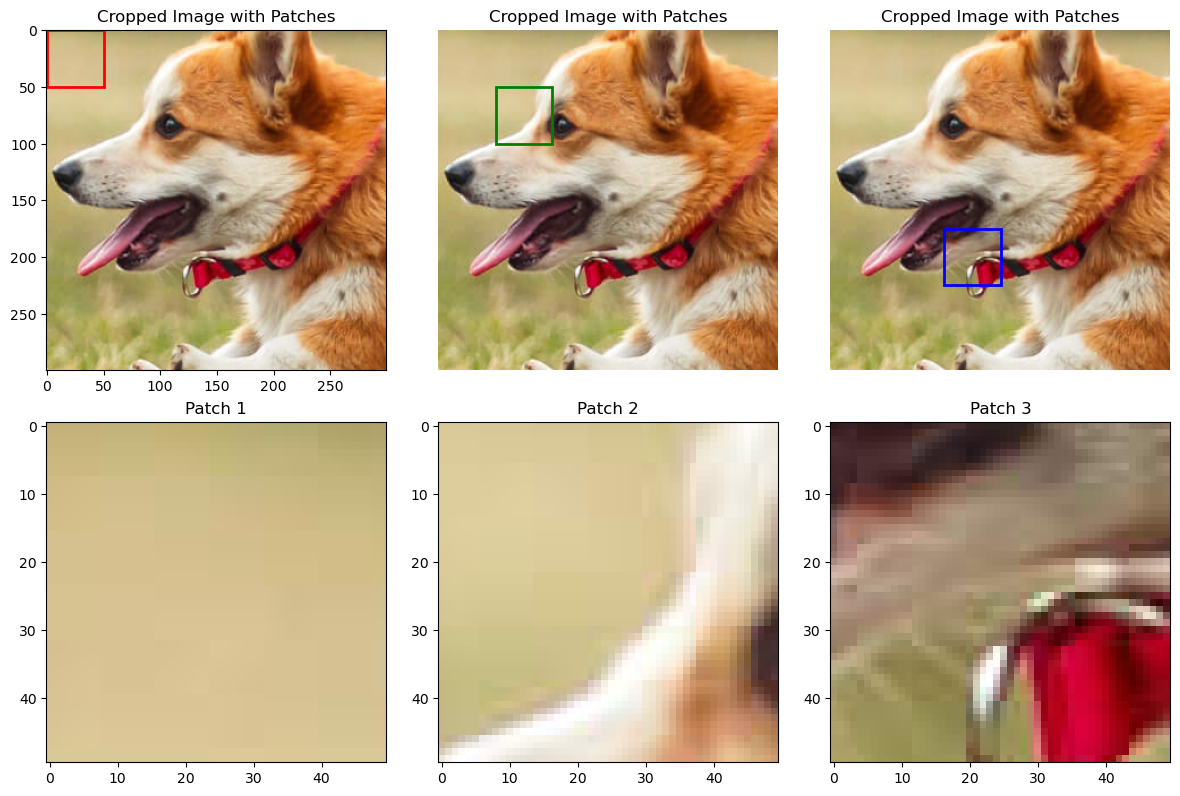

In [118]:
from sklearn import preprocessing

scaler_img = preprocessing.MinMaxScaler().fit(dog.reshape(-1, 1))
img_scaled = scaler_img.transform(dog.reshape(-1, 1)).reshape(dog.shape)
print(img_scaled.shape)
img_scaled = torch.tensor(img_scaled, dtype=torch.float32).to(device)
crop = torchvision.transforms.functional.crop(img_scaled.cpu(), 600, 800, 300, 300)
print(crop.shape)
patch_1 = torchvision.transforms.functional.crop(crop.cpu(), 0, 0 , 50, 50)
patch_2 = torchvision.transforms.functional.crop(crop.cpu(), 50, 50, 50, 50)
patch_3 = torchvision.transforms.functional.crop(crop.cpu(), 175, 100, 50, 50)

show_patches(crop, patch_1, patch_2, patch_3)

to_predict = [patch_1, patch_2, patch_3]

patch_positions = [(0, 0), (50, 50), (175, 100)]

In [112]:
def pred_rgb_patch(patch, r=25, verbose=True):
    pred_patches = []
    for _ in range(3):  # Process each color channel separately
        color_channel_patch = patch[_, :, :]
        U, V, loss = matrix_factorization(color_channel_patch, r, verbose=verbose)
        pred_patches.append(torch.mm(U, V))  # Reconstruct the patch using U and V
    
    rgb_patch = torch.stack(pred_patches, dim=0)  # Stack reconstructed channels back together
    
    # # Normalize reconstructed patch
    # scaler_patch = preprocessing.MinMaxScaler().fit(rgb_patch.reshape(-1, 1))
    # rgb_scaled_patch = scaler_patch.transform(rgb_patch.reshape(-1, 1)).reshape(rgb_patch.shape)
    # rgb_scaled_patch = torch.tensor(rgb_scaled_patch, dtype=torch.float32)
    
    return rgb_patch


In [113]:
pred_3 = pred_rgb_patch(patch_3, 50, False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.053411353..1.0107374].


Text(0.5, 1.0, 'Predicted Patch')

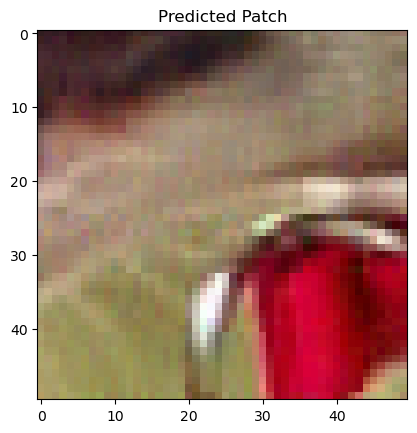

In [114]:
plt.imshow(rearrange(pred_3, 'c h w -> h w c').cpu().numpy())
plt.title("Predicted Patch")

In [115]:
import matplotlib.gridspec as gridspec
def visualize_pred_patches(patches, r):
    fig = plt.figure(figsize=(12,8))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1])

    ax0 = plt.subplot(gs[0])
    ax0.set_title(f'Patch_0')
    ax0.imshow(rearrange(patches[0], 'c h w -> h w c').cpu().numpy())

    ax1 = plt.subplot(gs[1])
    ax1.set_title(f'Patch_1')
    ax1.imshow(rearrange(patches[1],  'c h w -> h w c').cpu().numpy())
    
    ax2 = plt.subplot(gs[2])
    ax2.set_title(f"Patch_2")  
    ax2.imshow(rearrange(patches[2],  'c h w -> h w c').cpu().numpy())

    fig.suptitle(f'For r = {r}', fontsize=16, y=1.05) 
    plt.tight_layout()
    plt.show()

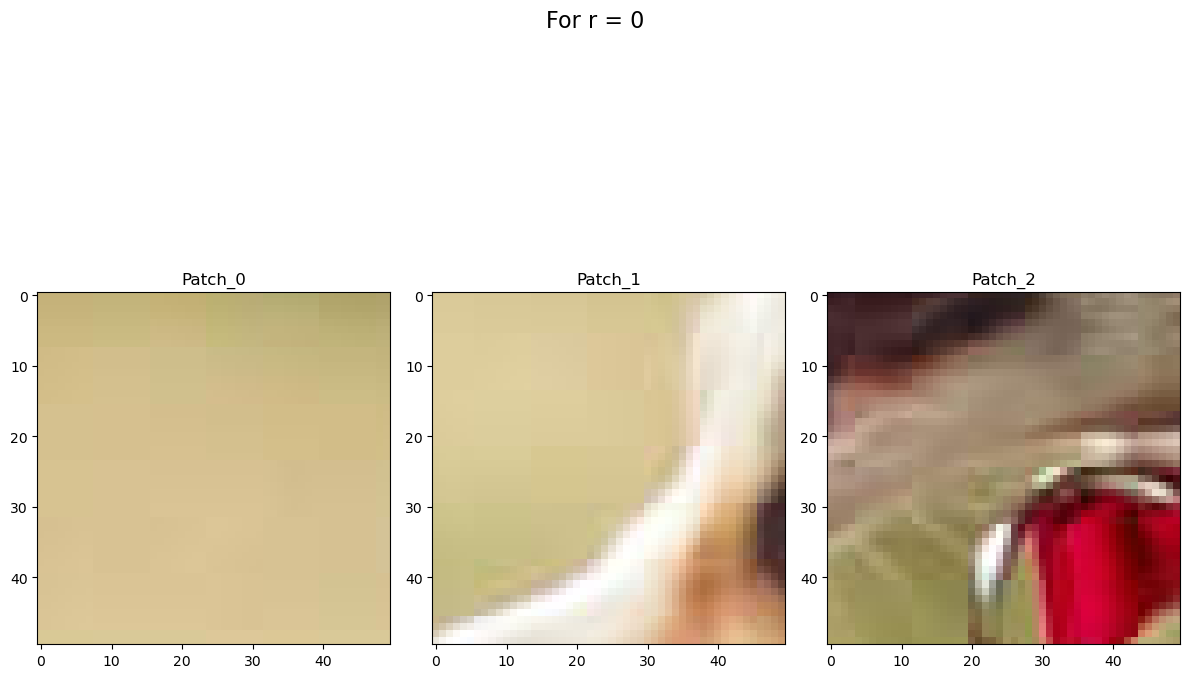

In [116]:
visualize_pred_patches(to_predict, 0)

torch.Size([3, 50, 50]) torch.Size([3, 50, 50]) torch.Size([3, 50, 50])


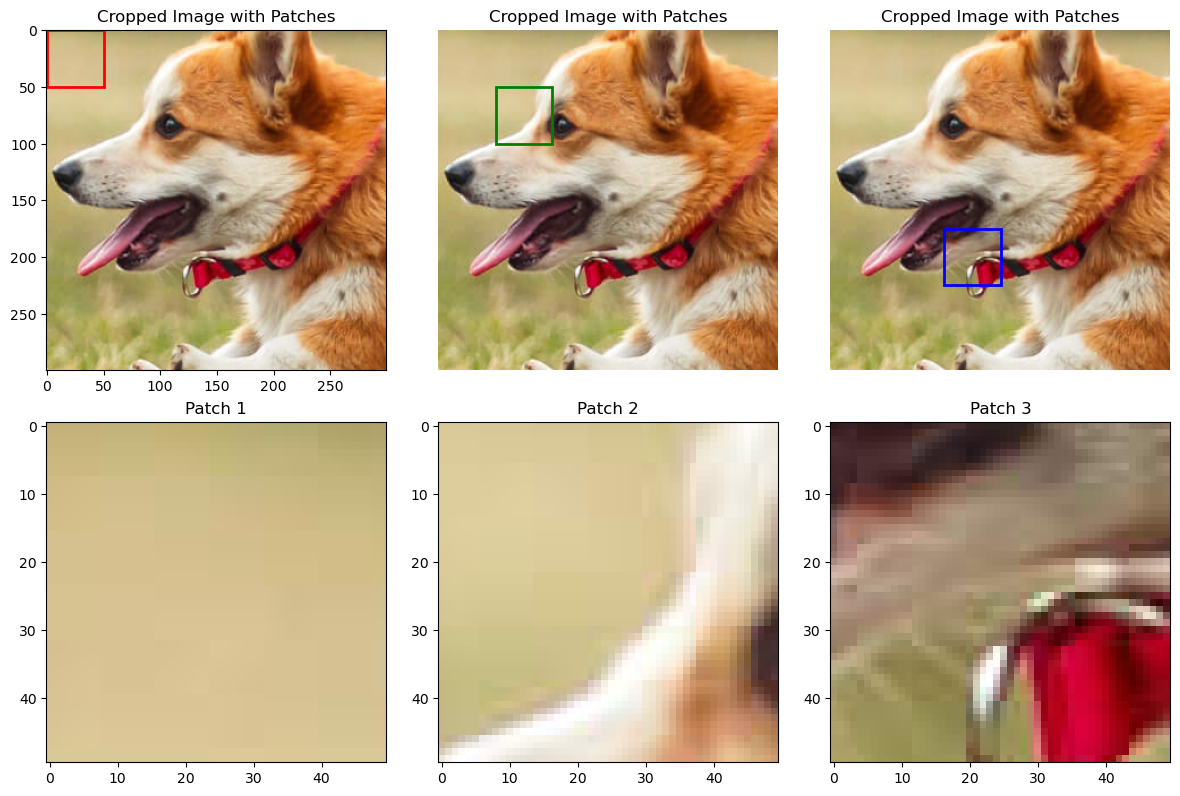

Testing for r = 5
r = 5: Patch: 0 -> RMSE = 0.0083, PSNR = 40.37 dB
r = 5: Patch: 1 -> RMSE = 0.0805, PSNR = 21.89 dB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09102529..1.0226681].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09416762..0.91880816].


r = 5: Patch: 2 -> RMSE = 0.0917, PSNR = 20.75 dB


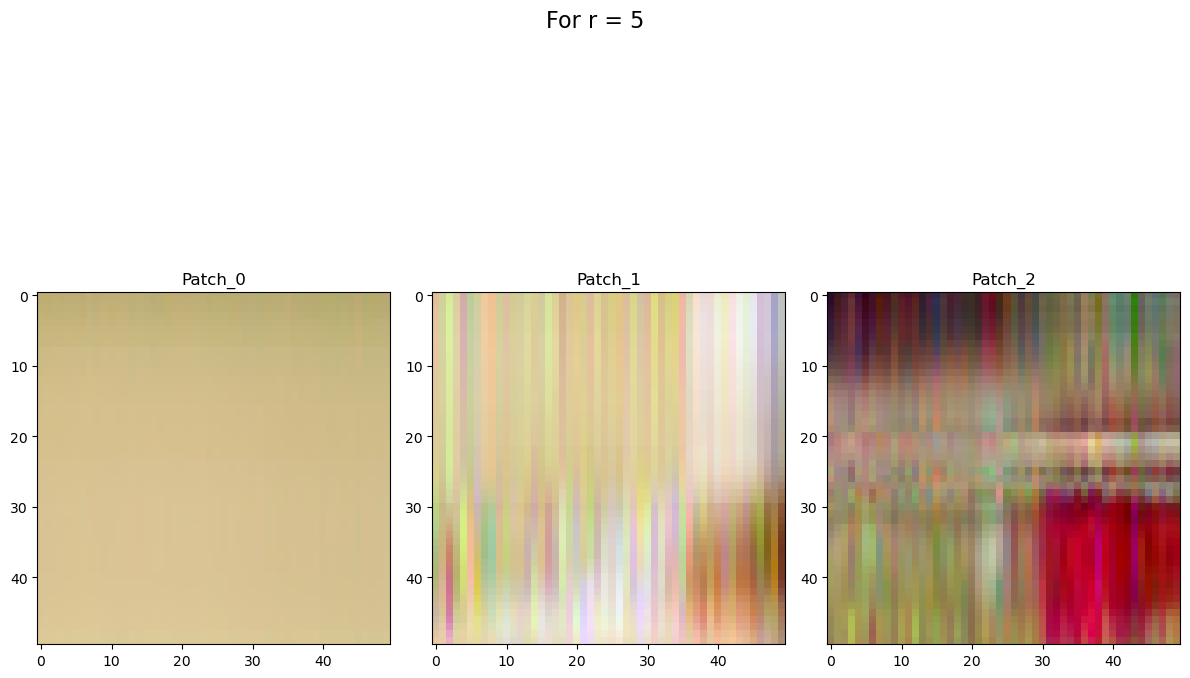

Testing for r = 10
r = 10: Patch: 0 -> RMSE = 0.0082, PSNR = 40.51 dB
r = 10: Patch: 1 -> RMSE = 0.0595, PSNR = 24.51 dB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10281369..1.110122].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10688025..0.9219603].


r = 10: Patch: 2 -> RMSE = 0.0724, PSNR = 22.80 dB


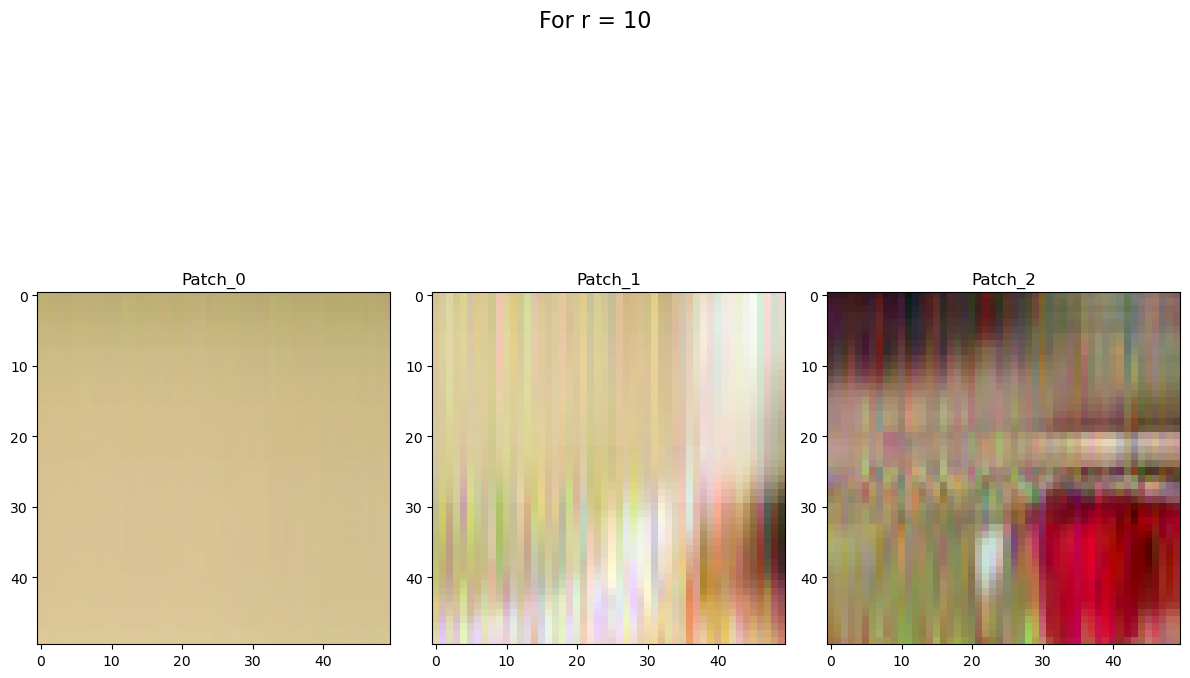

Testing for r = 25
r = 25: Patch: 0 -> RMSE = 0.0067, PSNR = 42.28 dB
r = 25: Patch: 1 -> RMSE = 0.0292, PSNR = 30.71 dB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13473113..1.030394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0890011..0.99984324].


r = 25: Patch: 2 -> RMSE = 0.0439, PSNR = 27.15 dB


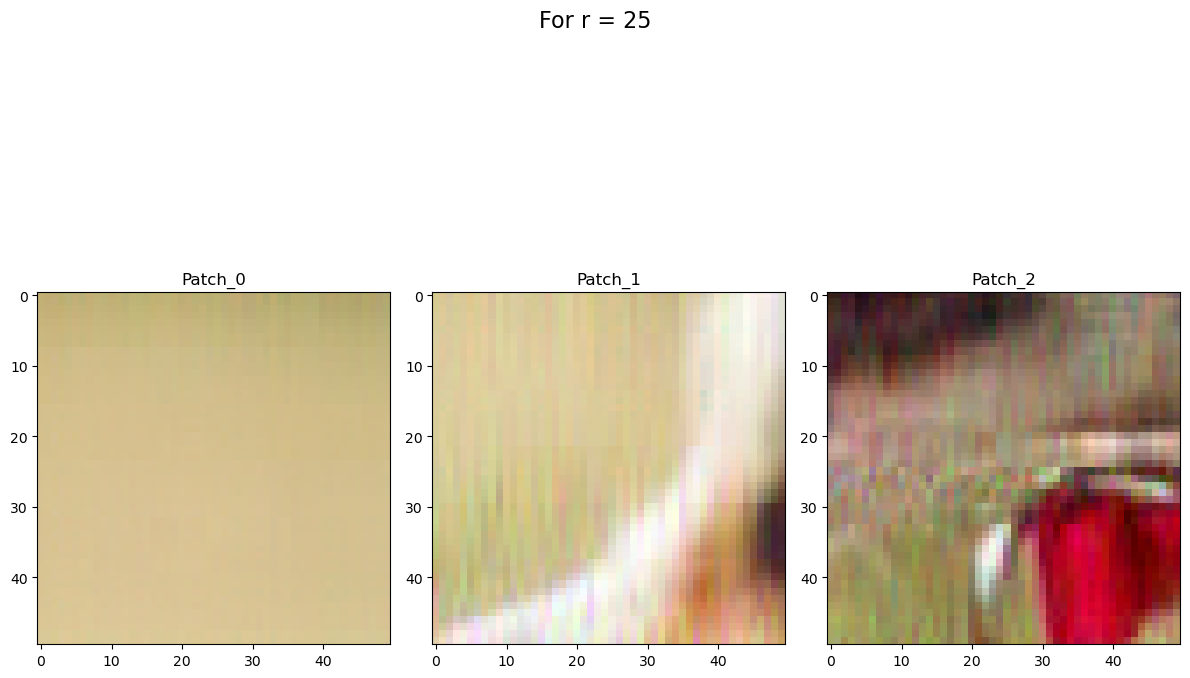

Testing for r = 50
r = 50: Patch: 0 -> RMSE = 0.0064, PSNR = 42.69 dB
r = 50: Patch: 1 -> RMSE = 0.0158, PSNR = 36.02 dB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11280975..1.0392315].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06646198..1.0057528].


r = 50: Patch: 2 -> RMSE = 0.0181, PSNR = 34.86 dB


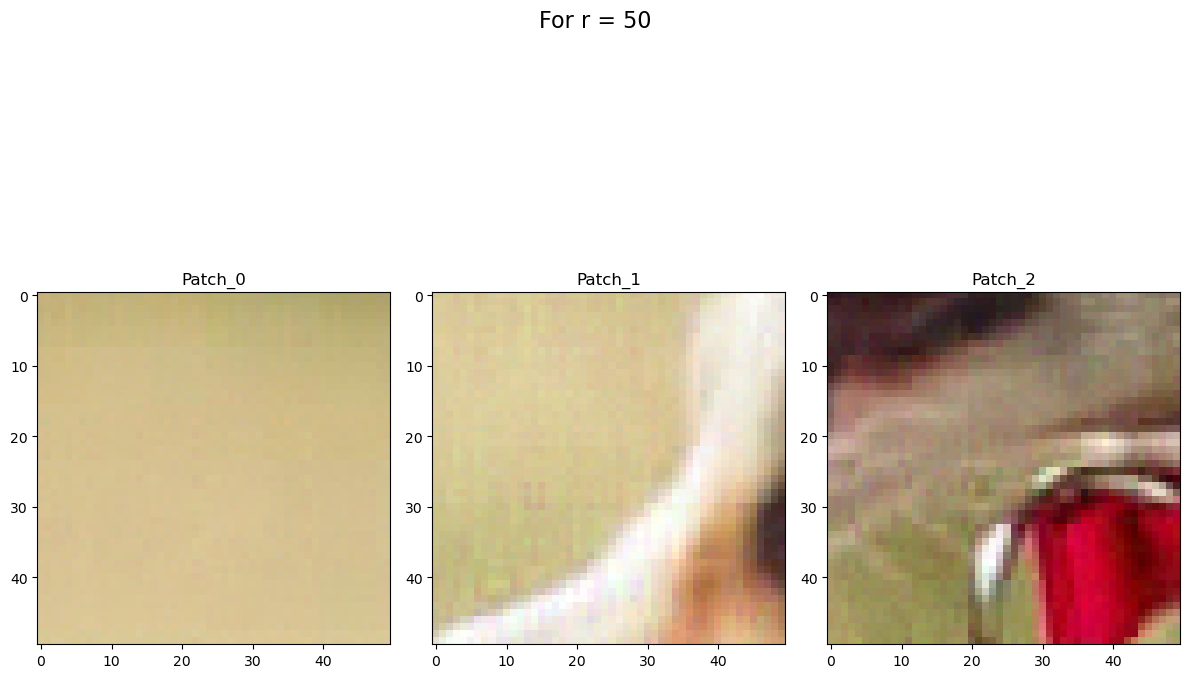

Testing for r = 100
r = 100: Patch: 0 -> RMSE = 0.0000, PSNR = 117.71 dB
r = 100: Patch: 1 -> RMSE = 0.0000, PSNR = 120.15 dB


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14117569..1.000004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8216523e-06..1.0000012].


r = 100: Patch: 2 -> RMSE = 0.0000, PSNR = 122.06 dB


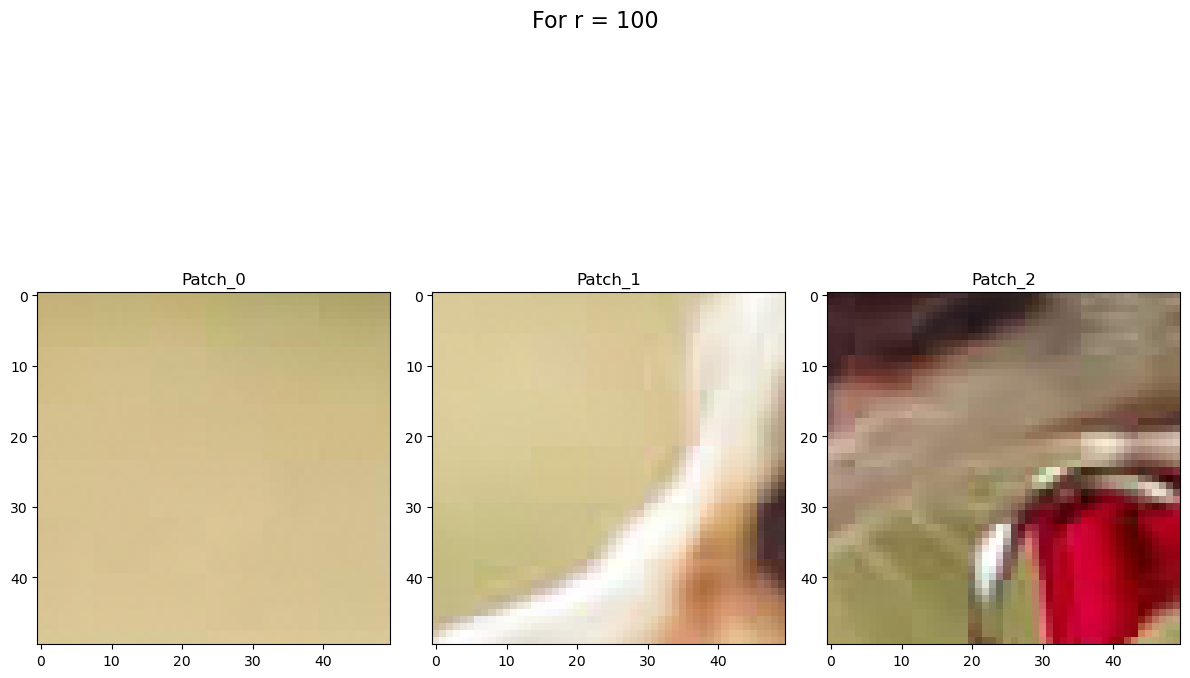

In [125]:
patches = [patch_1, patch_2, patch_3]
r = [5, 10, 25, 50, 100]

# Main function to test different values of r
def test_matrix_factorization(orginal_img, patches, r_values, learning_rate=0.005, epochs=1000):
    show_patches(crop, patch_1, patch_2, patch_3)
    
    pred_patches_with_r = []
    for r in r_values:
        print(f"Testing for r = {r}")
        pred_patches = []
        
        for i, img_patch in enumerate(patches):
            reconstructed_patch = pred_rgb_patch(img_patch, r, False)
            pred_patches.append(reconstructed_patch)
            
            # Compute RMSE and PSNR
            rmse_value = compute_rmse(img_patch, reconstructed_patch)
            psnr_value = psnr(img_patch, reconstructed_patch)

            # Print the metrics
            print(f"r = {r}: Patch: {i} -> RMSE = {rmse_value:.4f}, PSNR = {psnr_value:.2f} dB")
        
        # Visualize the original and reconstructed patches
        visualize_pred_patches(pred_patches, r)
    
        pred_patches_with_r.append(pred_patches)
    
    return pred_patches_with_r


output = test_matrix_factorization(crop, patches, r)

In [ ]:
def overlay_reconstructed_patches(original_img, patches, reconstructed_patches):
    # Copy the original image to avoid modifying it directly
    img_with_reconstructed_patches = original_img.clone()

    # Define the positions where patches were taken from
    positions = [(0, 0), (50, 50), (100, 175)]  # (top-left corner for each patch)

    for i, (reconstructed_patch, (top, left)) in enumerate(zip(reconstructed_patches, positions)):
        # Overlay the reconstructed patch in the correct location
        img_with_reconstructed_patches[:, top:top+50, left:left+50] = reconstructed_patch

    # Display the image with the reconstructed patches
    plt.imshow(rearrange(img_with_reconstructed_patches, 'c h w -> h w c').cpu().numpy())
    plt.title("Image with Reconstructed Patches")
    plt.show()

# Function to reconstruct and overlay patches
def reconstruct_and_overlay_patches(original_img, patches, r):
    reconstructed_patches = []
    for patch in patches:
        # Reconstruct the patch using matrix factorization
        reconstructed_patch = pred_rgb_patch(patch, r, False)
        reconstructed_patches.append(reconstructed_patch)

    # Overlay the reconstructed patches onto the original image
    overlay_reconstructed_patches(original_img, patches, reconstructed_patches)

# Test the function for a value of r
reconstruct_and_overlay_patches(crop, patches, r=50,)



Overlay Comparison for r-value: 5
torch.Size([3, 50, 50]) torch.Size([3, 50, 50]) torch.Size([3, 50, 50])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09102529..1.0226681].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09416762..0.91880816].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0226681].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.09416762..1.0].


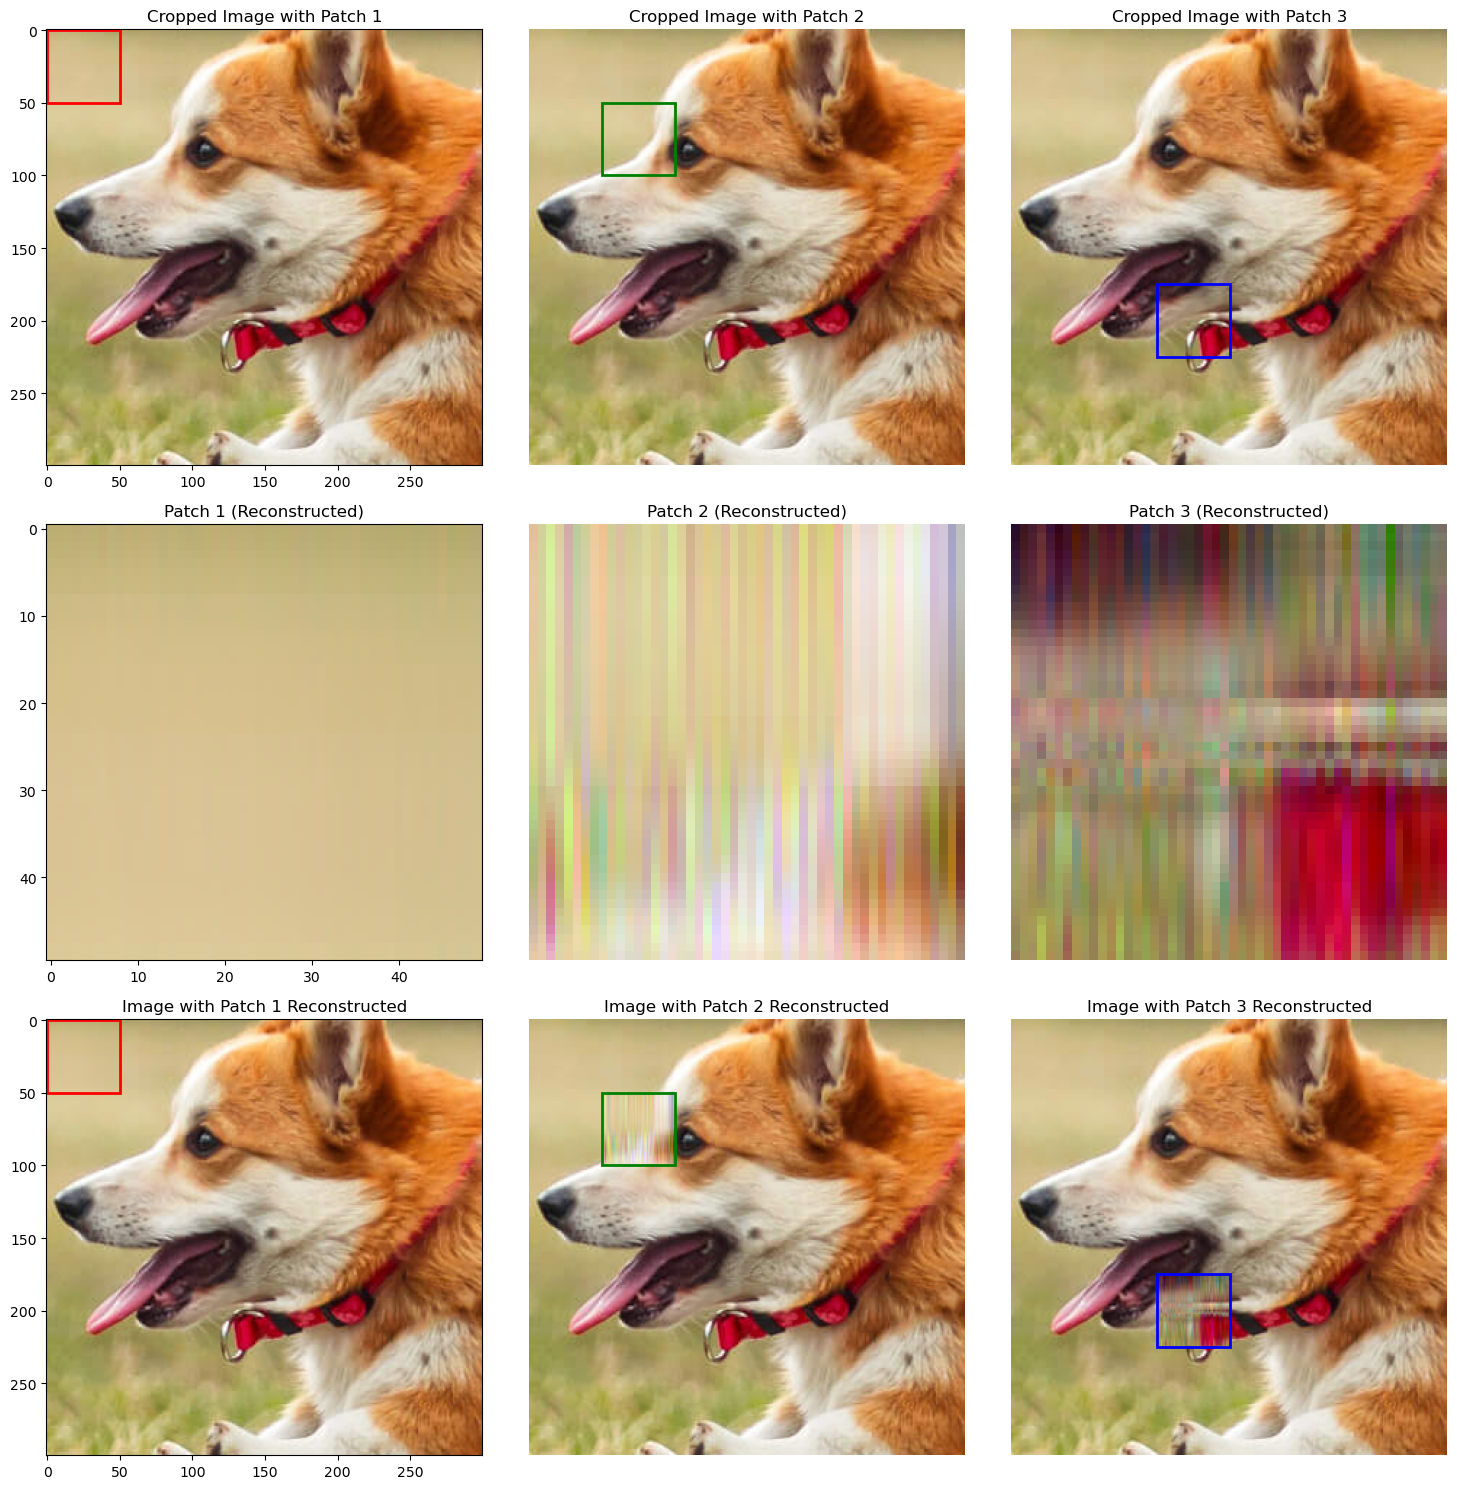

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10281369..1.110122].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10688025..0.9219603].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.110122].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.10688025..1.0].


Overlay Comparison for r-value: 10
torch.Size([3, 50, 50]) torch.Size([3, 50, 50]) torch.Size([3, 50, 50])


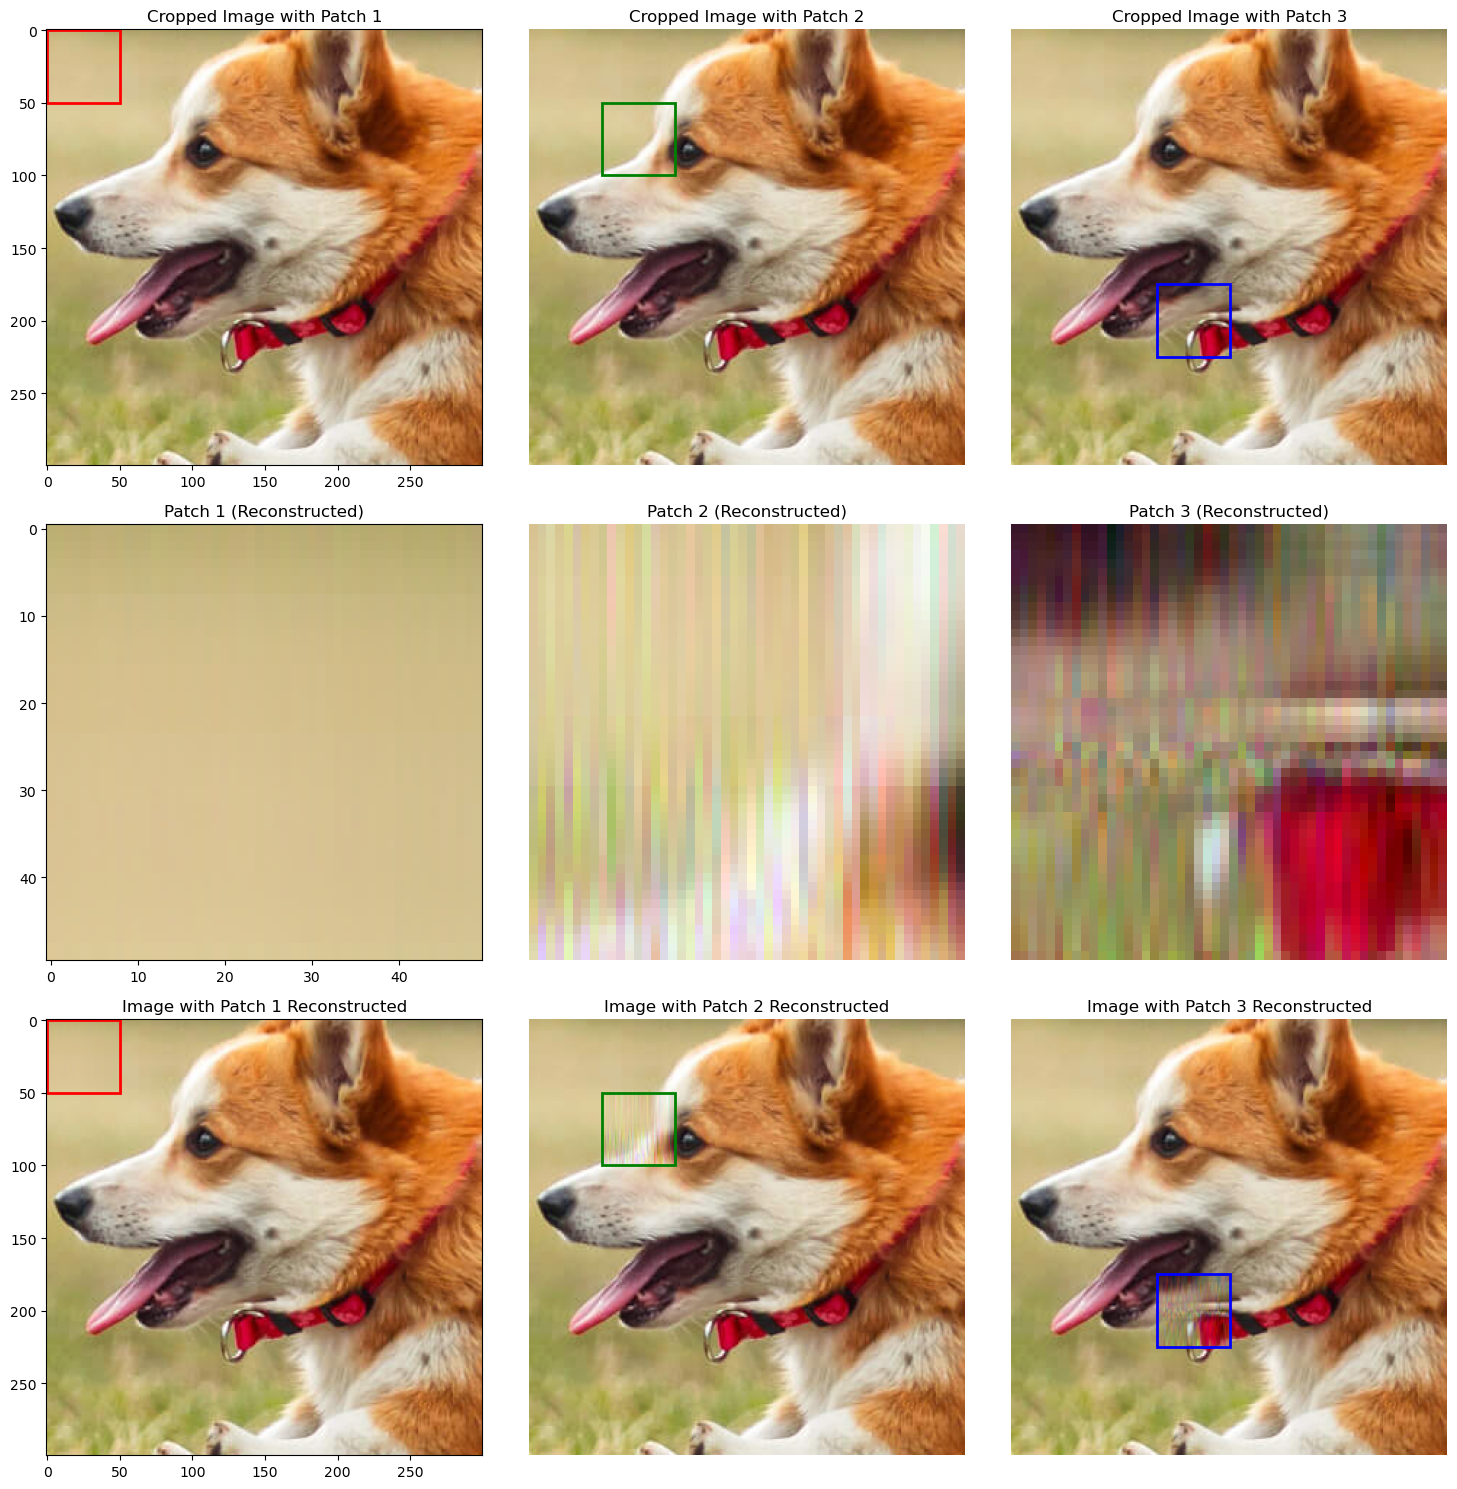

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13473113..1.030394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0890011..0.99984324].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.030394].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0890011..1.0].


Overlay Comparison for r-value: 25
torch.Size([3, 50, 50]) torch.Size([3, 50, 50]) torch.Size([3, 50, 50])


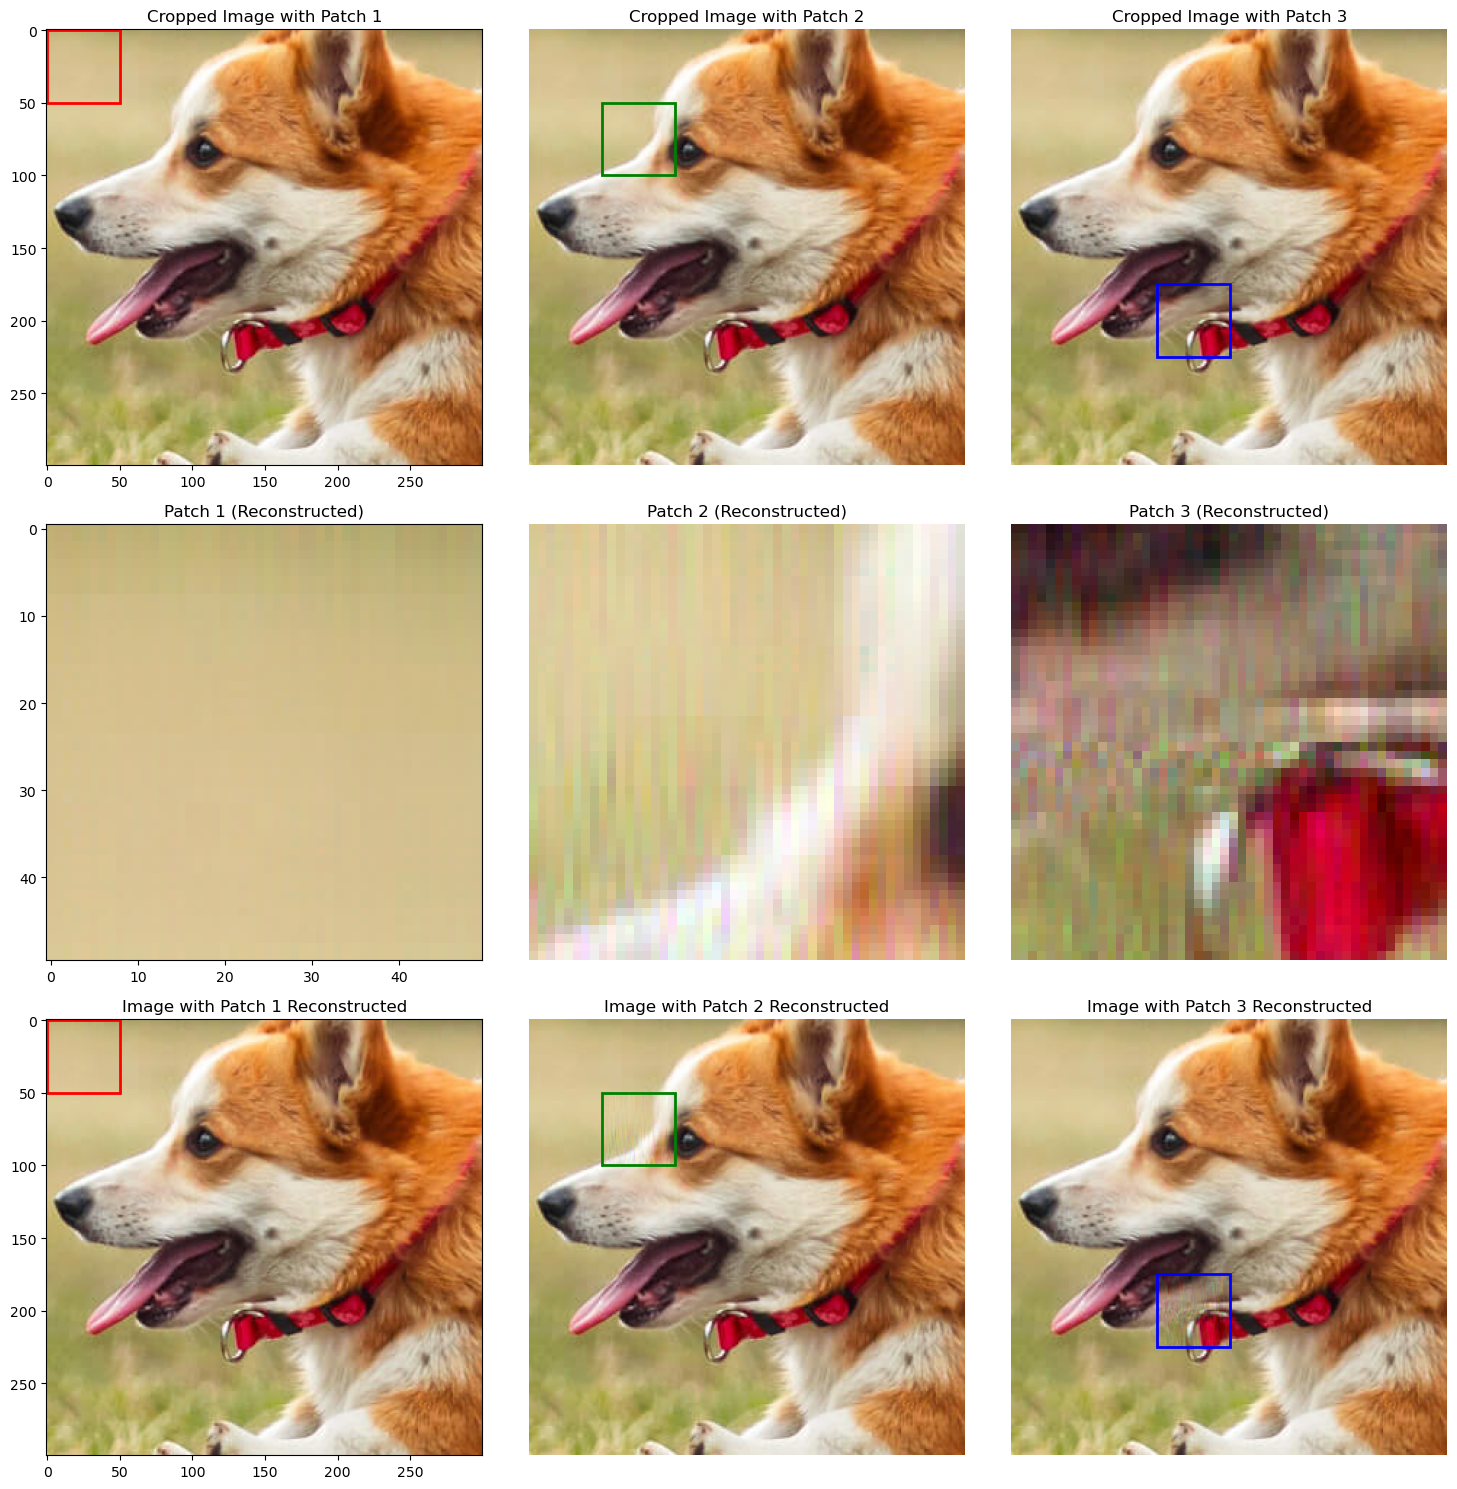

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11280975..1.0392315].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06646198..1.0057528].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0392315].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.06646198..1.0057528].


Overlay Comparison for r-value: 50
torch.Size([3, 50, 50]) torch.Size([3, 50, 50]) torch.Size([3, 50, 50])


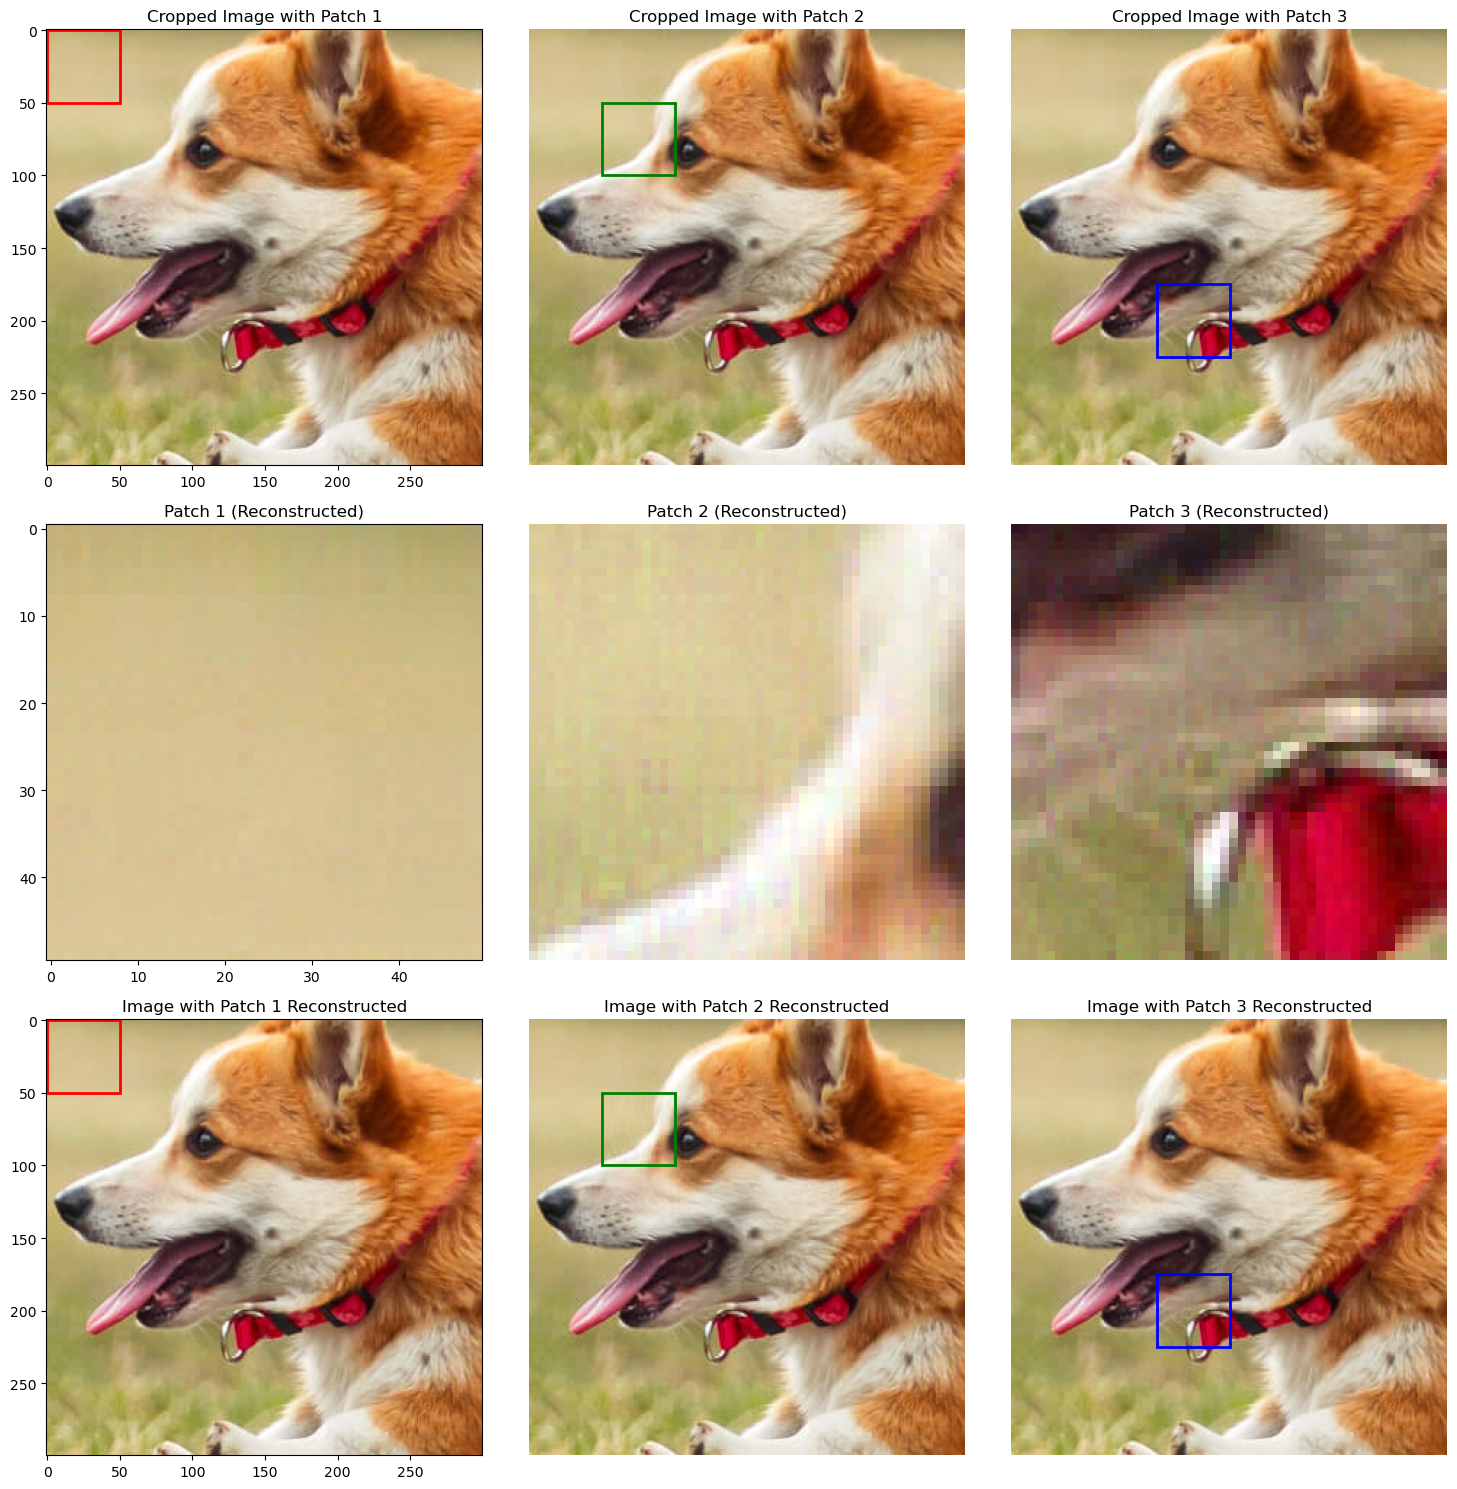

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.14117569..1.000004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8216523e-06..1.0000012].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.000004].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.8216523e-06..1.0000012].


Overlay Comparison for r-value: 100
torch.Size([3, 50, 50]) torch.Size([3, 50, 50]) torch.Size([3, 50, 50])


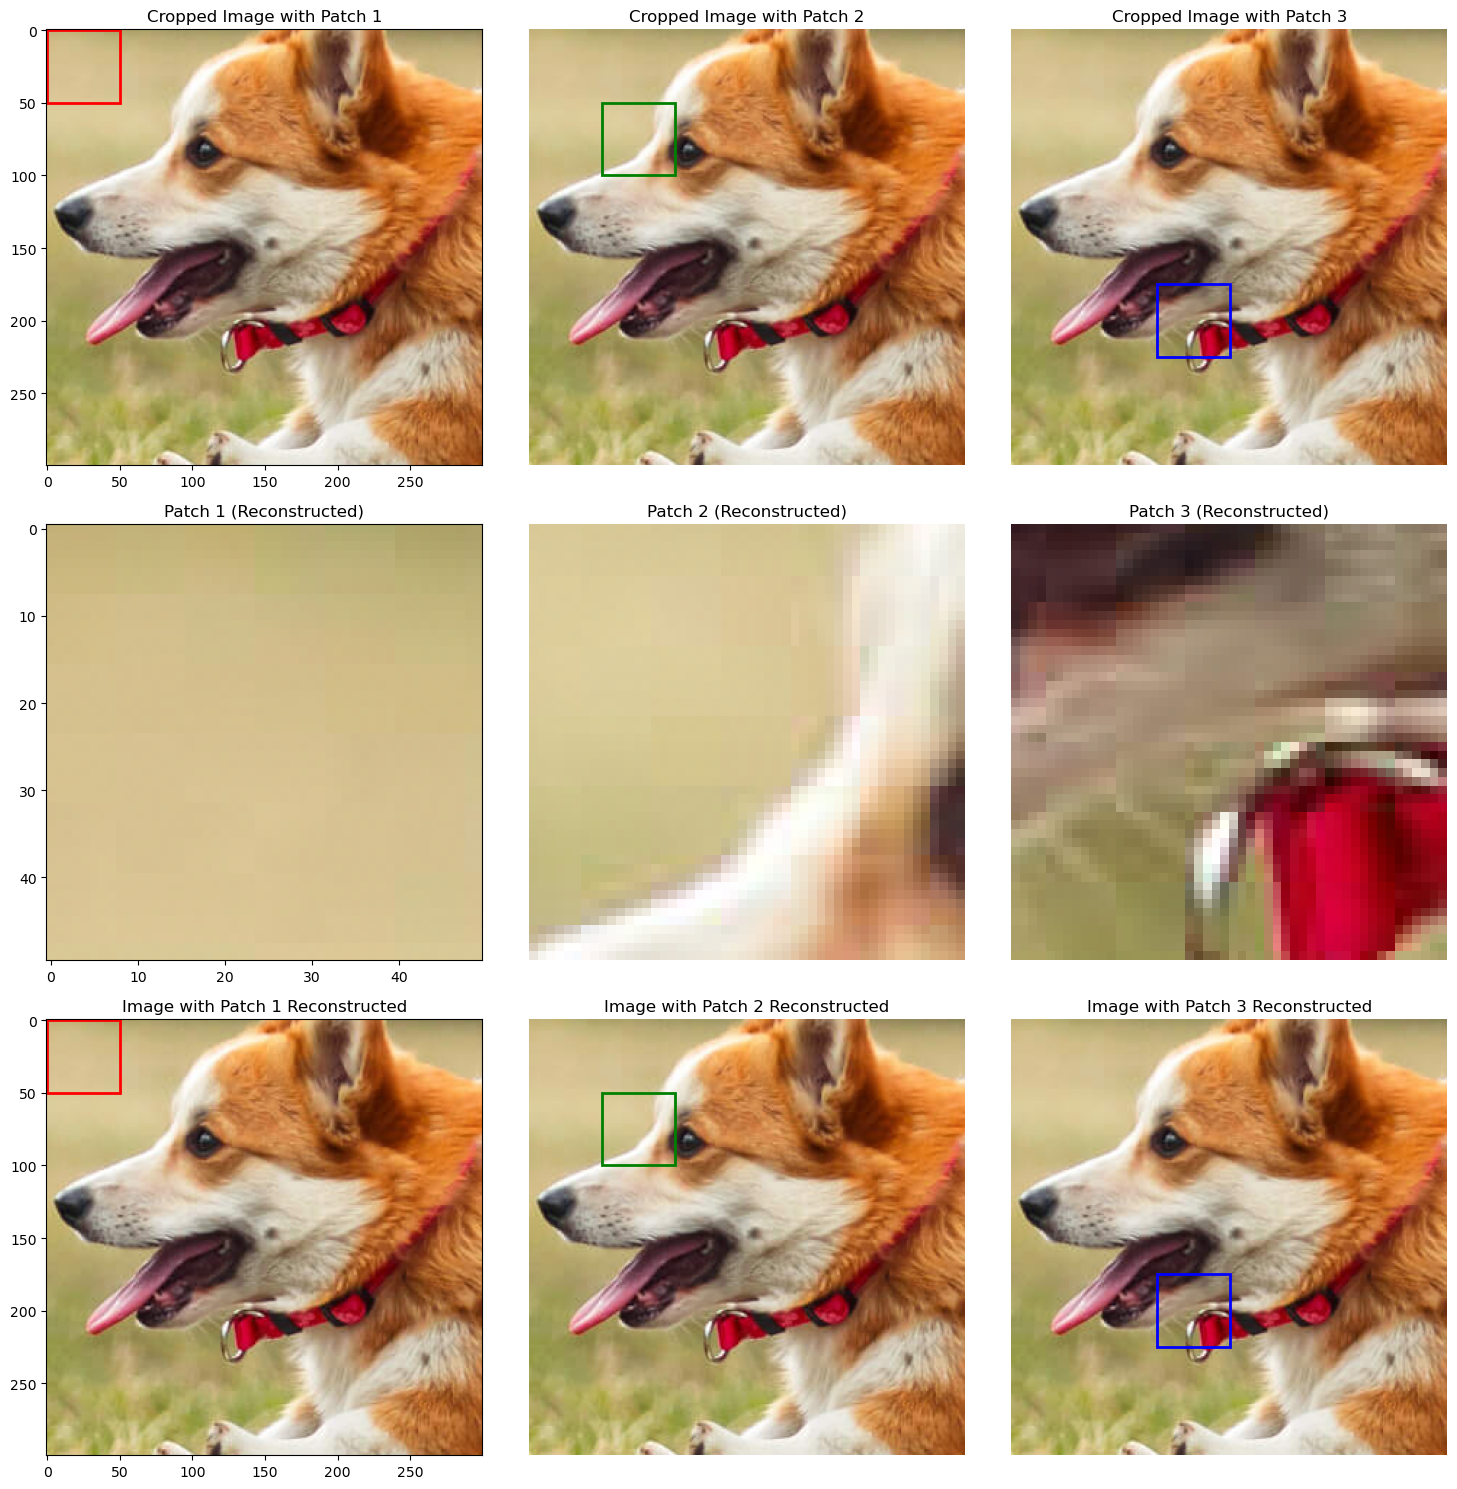

In [144]:
from matplotlib.patches import Rectangle

def show_overlay_patches(crop, patch_1, patch_2, patch_3, patch_positions):
    
    print(patch_1.shape, patch_2.shape, patch_3.shape)
    reconstructed_patches = [patch_1, patch_2, patch_3]

    fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # 3 rows, 3 columns

    # Plot the cropped image with rectangles on the first row
    axs[0, 0].imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())
    axs[0, 1].imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())
    axs[0, 2].imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())
    axs[0, 0].set_title("Cropped Image with Patch 1")
    axs[0, 1].set_title("Cropped Image with Patch 2")
    axs[0, 2].set_title("Cropped Image with Patch 3")

    # Create the rectangular patches on the cropped image
    rect1 = Rectangle((0, 0), 50, 50, linewidth=2, edgecolor='r', facecolor='none')
    rect2 = Rectangle((50, 50), 50, 50, linewidth=2, edgecolor='g', facecolor='none')
    rect3 = Rectangle((100, 175), 50, 50, linewidth=2, edgecolor='b', facecolor='none')

    # Add rectangles to the cropped images
    axs[0, 0].add_patch(rect1)
    axs[0, 1].add_patch(rect2)
    axs[0, 2].add_patch(rect3)

    # Empty the next two subplots in the rows
    axs[0, 1].axis('off')
    axs[0, 2].axis('off')
    axs[1, 1].axis('off')
    axs[1, 2].axis('off')
    axs[2, 1].axis('off')
    axs[2, 2].axis('off')

    # Plot individual patches on the second row
    axs[1, 0].imshow(rearrange(patch_1, 'c h w -> h w c').cpu().numpy())
    axs[1, 0].set_title("Patch 1 (Reconstructed)")

    axs[1, 1].imshow(rearrange(patch_2, 'c h w -> h w c').cpu().numpy())
    axs[1, 1].set_title("Patch 2 (Reconstructed)")

    axs[1, 2].imshow(rearrange(patch_3, 'c h w -> h w c').cpu().numpy())
    axs[1, 2].set_title("Patch 3 (Reconstructed)")

    # Overlay reconstructed patches on the original cropped image (3rd row)
    for i, (top, left) in enumerate(patch_positions):
        img_ = crop.clone()  # Clone the original cropped image
        img_[:, top:top+50, left:left+50] = reconstructed_patches[i]
        axs[2, i].imshow(rearrange(img_, 'c h w -> h w c').cpu().numpy())
        
        # Create and add a new rectangle for each subplot
        if i == 0:
            rect = Rectangle((0, 0), 50, 50, linewidth=2, edgecolor='r', facecolor='none')
        elif i == 1:
            rect = Rectangle((50, 50), 50, 50, linewidth=2, edgecolor='g', facecolor='none')
        else:
            rect = Rectangle((100, 175), 50, 50, linewidth=2, edgecolor='b', facecolor='none')
        
        axs[2, i].add_patch(rect)
        axs[2, i].set_title(f"Image with Patch {i+1} Reconstructed")

    # Adjust layout for better spacing between plots
    plt.tight_layout()

    # Show the figure
    plt.show()



# Example usage (adjust patch positions accordingly):
patch_positions = [(0, 0), (50, 50), (175, 100)]

# Iterate through r values and corresponding output patches
for i, (r_value, out) in enumerate(zip(r, output)):
    print(f"Overlay Comparison for r-value: {r_value}")
    show_overlay_patches(crop, out[0], out[1], out[2], patch_positions)
